In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

pd.options.display.max_columns = 100000

In [3]:
# Load in data

# Kaggle NFL game scores and spreads since 1966
scores = pd.read_csv('spreadspoke_scores.csv')
home_teams = pd.read_csv('nfl_teams_home.csv')
away_teams = pd.read_csv('nfl_teams_away.csv')
stadiums = pd.read_csv('nfl_stadiums.csv', encoding='latin1')

# 2020 Pro Football Reference Data
team_offense = pd.read_csv('pfr_team_offense.csv')
drives_allowed = pd.read_csv('pfr_defensive_drives.csv')
conversions_allowed = pd.read_csv('pfr_defense_conversions.csv')
scoring_defense = pd.read_csv('pfr_scoring_defense.csv')
kicks_punts_against = pd.read_csv('pfr_kicks_punts_against.csv')
returns_against = pd.read_csv('pfr_returns_against.csv')
rushing_defense = pd.read_csv('pfr_rushing_defense.csv')
passing_defense = pd.read_csv('pfr_passing_defense.csv')
adv_defense = pd.read_csv('pfr_adv_defense.csv')
team_defense = pd.read_csv('pfr_team_defense.csv')
offense_drives = pd.read_csv('pfr_offense_drives.csv')
scoring_offense = pd.read_csv('pfr_scoring_offense.csv')
offense_conversions = pd.read_csv('pfr_offense_conversions.csv')
kicks_punts = pd.read_csv('pfr_kicks_punts.csv')
returns = pd.read_csv('pfr_returns.csv')
rushing_offense = pd.read_csv('pfr_rushing_offense.csv')
passing_offense = pd.read_csv('pfr_passing_offense.csv')

In [4]:
# Merging betting data with stadiums the games were played in
scores_n_stadiums = scores.merge(stadiums, on=('stadium_name'), suffixes=('_l', '_r'))

In [4]:
# Merging Team info data to scores_n_stadiums
scores_stadiums_teams = scores_n_stadiums.merge(home_teams, on=('team_home'), suffixes=('_l', '_r'))
scores_stadiums_teams = scores_n_stadiums.merge(away_teams, on=('team_away'), suffixes=('_l', '_r'))

In [5]:
# Create column for final score margin of home-away
scores_stadiums_teams['score_margin_hma'] = scores_stadiums_teams['score_home']-scores_stadiums_teams['score_away']

In [6]:
#scores_stadiums_teams
scores_stadiums_teams['over_under_line'].value_counts()

41      593
42      538
44      532
43      518
37      505
       ... 
30.5      1
63.5      1
63        1
29.5      1
61.5      1
Name: over_under_line, Length: 68, dtype: int64

In [7]:
# Create df of 2020 sports betting data, teams, and stadiums
df_2020 = scores_stadiums_teams[scores_stadiums_teams['schedule_season'] == 2020]

In [8]:
# Created full datasets for 2020 offenses and defenses based off PFR data

pfr_data_2020_home = team_offense
pfr_data_2020_home = pfr_data_2020_home.merge(passing_offense, how='left', on=('Tm'),suffixes=('_H', '_poH'))
pfr_data_2020_home = pfr_data_2020_home.merge(rushing_offense, how='left', on=('Tm'),suffixes=('_H', '_roH'))
pfr_data_2020_home = pfr_data_2020_home.merge(returns, how='left', on=('Tm'),suffixes=('_H', '_retH'))
pfr_data_2020_home = pfr_data_2020_home.merge(kicks_punts, how='left', on=('Tm'),suffixes=('_H', '_kpH'))
pfr_data_2020_home = pfr_data_2020_home.merge(offense_conversions, how='left', on=('Tm'),suffixes=('_H', '_oconvH'))
pfr_data_2020_home = pfr_data_2020_home.merge(offense_drives, how='left', on=('Tm'),suffixes=('_H', '_odrivH'))
pfr_data_2020_home = pfr_data_2020_home.merge(team_defense, how='left', on=('Tm'),suffixes=('_H', '_tdH'))
pfr_data_2020_home = pfr_data_2020_home.merge(adv_defense, how='left', on=('Tm'),suffixes=('_H', '_adH'))
pfr_data_2020_home = pfr_data_2020_home.merge(passing_defense, how='left', on=('Tm'),suffixes=('_H', '_pdH'))
pfr_data_2020_home = pfr_data_2020_home.merge(rushing_defense, how='left', on=('Tm'),suffixes=('_H', '_rdH'))
pfr_data_2020_home = pfr_data_2020_home.merge(returns_against, how='left', on=('Tm'),suffixes=('_H', '_retdH'))
pfr_data_2020_home = pfr_data_2020_home.merge(kicks_punts_against, how='left', on=('Tm'),suffixes=('_H', '_kpdH'))
pfr_data_2020_home = pfr_data_2020_home.merge(conversions_allowed, how='left', on=('Tm'),suffixes=('_H', '_dconvH'))
pfr_data_2020_home = pfr_data_2020_home.merge(drives_allowed, how='left', on=('Tm'),suffixes=('_H', '_ddrivH'))

pfr_data_2020_away = team_offense
pfr_data_2020_away = pfr_data_2020_away.merge(passing_offense, how='left', on=('Tm'),suffixes=('_A', '_poA'))
pfr_data_2020_away = pfr_data_2020_away.merge(rushing_offense, how='left', on=('Tm'),suffixes=('_A', '_roA'))
pfr_data_2020_away = pfr_data_2020_away.merge(returns, how='left', on=('Tm'),suffixes=('_A', '_retA'))
pfr_data_2020_away = pfr_data_2020_away.merge(kicks_punts, how='left', on=('Tm'),suffixes=('_A', '_kpA'))
pfr_data_2020_away = pfr_data_2020_away.merge(offense_conversions, how='left', on=('Tm'),suffixes=('_A', '_oconvA'))
pfr_data_2020_away = pfr_data_2020_away.merge(offense_drives, how='left', on=('Tm'),suffixes=('_A', '_odrivA'))
pfr_data_2020_away = pfr_data_2020_away.merge(team_defense, how='left', on=('Tm'),suffixes=('_A', '_tdA'))
pfr_data_2020_away = pfr_data_2020_away.merge(adv_defense, how='left', on=('Tm'),suffixes=('_A', '_adA'))
pfr_data_2020_away = pfr_data_2020_away.merge(passing_defense, how='left', on=('Tm'),suffixes=('_A', '_pdA'))
pfr_data_2020_away = pfr_data_2020_away.merge(rushing_defense, how='left', on=('Tm'),suffixes=('_A', '_rdA'))
pfr_data_2020_away = pfr_data_2020_away.merge(returns_against, how='left', on=('Tm'),suffixes=('_A', '_retdA'))
pfr_data_2020_away = pfr_data_2020_away.merge(kicks_punts_against, how='left', on=('Tm'),suffixes=('_A', '_kpdA'))
pfr_data_2020_away = pfr_data_2020_away.merge(conversions_allowed, how='left', on=('Tm'),suffixes=('_A', '_dconvA'))
pfr_data_2020_away = pfr_data_2020_away.merge(drives_allowed, how='left', on=('Tm'),suffixes=('_A', '_ddrivA'))

#df_2020 = df_2020.merge(away_teams, on=('team_away'), suffixes=('_l', '_r'))

In [9]:
# Send merged PFR data to a csv for home and away teams
pfr_data_2020_home.to_csv('pfr_data_2020_home.csv')
pfr_data_2020_away.to_csv('pfr_data_2020_away.csv')

In [10]:
# Rename PFR data team column
pfr_data_2020_home = pfr_data_2020_home.rename(columns={"Tm": "team_home"})
pfr_data_2020_away = pfr_data_2020_away.rename(columns={"Tm": "team_away"})

In [11]:
# Merging PFR data onto 2020 data
df_2020 = df_2020.merge(pfr_data_2020_home, on=('team_home'))
df_2020 = df_2020.merge(pfr_data_2020_away, on=('team_away'))

In [12]:
# Creating True or False home_favorite column
df_2020['home_favorite'] = df_2020.apply(lambda x: str(df_2020.team_home) in str(df_2020.team_favorite), axis=1)

In [13]:
df_2020

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_favorite,spread_favorite,over_under_line,stadium_name,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,team_away_short,team_away_id,team_away_id_pfr,team__away_conference,team_away_division,team_away_conference_pre2002,team_away_division_pre2002,score_margin_hma,Rk_H,G_H,PF_H,Yds_H,Ply_H,Y/P_H,TO_H,FL_H,1stD_H,Cmp_H,Att_H,Yds.1_H,TD_H,Int_H,NY/A_H,1stD.1_H,Att.1_H,Yds.2_H,TD.1_H,Y/A_H,1stD.2_H,Pen_H,Yds.3_H,1stPy_H,Sc%_H,TO%_H,EXP_H,Rk_poH,G_poH,Cmp_poH,Att_poH,Cmp%_H,Yds_poH,TD_poH,TD%_H,Int_poH,Int%_H,Lng_H,Y/A_poH,AY/A_H,Y/C_H,Y/G_H,Rate_H,Sk_H,Yds.1_poH,NY/A_poH,ANY/A_H,Sk%_H,4QC_x,GWD_x,EXP_poH,Rk_H,G_H,Att_H,Yds_H,TD_H,Lng_roH,Y/A_H,Y/G_roH,Fmb_x,EXP_H,Rk_retH,G_retH,Ret_H,Yds_retH,TD_retH,Lng_H,Y/R_H,Rt_H,Yds.1_H,TD.1_retH,Lng.1_H,Y/Rt_H,APYd_x,Rk_H,G_H,FGA_H,FGM_H,FGA.1_x,FGM.1_x,FGA.2_x,FGM.2_x,FGA.3_x,FGM.3_x,FGA.4_x,FGM.4_x,FGA.5_x,FGM.5_x,Lng_kpH,FG%_H,XPA_H,XPM_H,XP%_H,KO_x,KOYds_x,TB_x,TB%_x,KOAvg_x,Pnt_H,Yds_H,Lng.1_kpH,Blck_H,Y/P_kpH,Rk_oconvH,G_oconvH,3DAtt_H,3DConv_H,3D%_H,4DAtt_H,4DConv_H,4D%_H,RZAtt_H,RZTD_H,RZPct_H,Rk_H,G_H,#Dr_H,Plays_H,Sc%_odrivH,TO%_odrivH,Plays.1_H,Yds_odrivH,Start_H,Time_H,Pts_H,Rk_tdH,G_tdH,PF_tdH,Yds_H,Ply_tdH,Y/P_H,TO_tdH,FL_tdH,1stD_tdH,Cmp_H,Att_tdH,Yds.1_tdH,TD_H,Int_H,NY/A_H,1stD.1_tdH,Att.1_tdH,Yds.2_tdH,TD.1_H,Y/A_tdH,1stD.2_tdH,Pen_tdH,Yds.3_tdH,1stPy_tdH,Sc%_H,TO%_H,EXP_tdH,G_H,Att_H,Cmp_adH,Yds_adH,TD_adH,DADOT_x,Air_x,YAC_x,Bltz_x,Bltz%_x,Hrry_x,Hrry%_x,QBKD_x,QBKD%_x,Sk_adH,Prss_x,Prss%_x,MTkl_x,Rk_H,G_pdH,Cmp_x,Att_pdH,Cmp%_pdH,Yds_H,TD_H,TD%_pdH,Int_pdH,PD_x,Int%_pdH,Y/A_H,AY/A_pdH,Y/C_pdH,Y/G_H,Rate_pdH,Sk_x,Yds.1_H,QBHits_x,TFL_x,NY/A_pdH,ANY/A_pdH,Sk%_pdH,EXP_H,Rk_rdH,G_H,Att_x,Yds_rdH,TD_rdH,Y/A_rdH,Y/G_rdH,EXP_rdH,Rk_H,G_retdH,Ret_retdH,Yds_H,TD_x,Y/R_retdH,Rt_retdH,Yds.1_retdH,TD.1_retdH,Y/Rt_retdH,Rk_kpdH,G_H,FGA_kpdH,FGM_kpdH,FG%_kpdH,XPA_kpdH,XPM_kpdH,XP%_kpdH,Pnt_kpdH,Yds_kpdH,Blck_kpdH,Y/P_kpdH,Rk_H,G_dconvH,3DAtt_dconvH,3DConv_dconvH,3D%_dconvH,4DAtt_dconvH,4DConv_dconvH,4D%_dconvH,RZAtt_dconvH,RZTD_dconvH,RZPct_dconvH,Rk_ddrivH,G_x,#Dr_ddrivH,Plays_ddrivH,Sc%_ddrivH,TO%_ddrivH,Plays.1_ddrivH,Yds_x,Start_ddrivH,Time_ddrivH,Pts_ddrivH,Rk_A,G_A,PF_A,Yds_A,Ply_A,Y/P_A,TO_A,FL_A,1stD_A,Cmp_A,Att_A,Yds.1_A,TD_A,Int_A,NY/A_A,1stD.1_A,Att.1_A,Yds.2_A,TD.1_A,Y/A_A,1stD.2_A,Pen_A,Yds.3_A,1stPy_A,Sc%_A,TO%_A,EXP_A,Rk_poA,G_poA,Cmp_poA,Att_poA,Cmp%_A,Yds_poA,TD_poA,TD%_A,Int_poA,Int%_A,Lng_A,Y/A_poA,AY/A_A,Y/C_A,Y/G_A,Rate_A,Sk_A,Yds.1_poA,NY/A_poA,ANY/A_A,Sk%_A,4QC_y,GWD_y,EXP_poA,Rk_A,G_A,Att_A,Yds_A,TD_A,Lng_roA,Y/A_A,Y/G_roA,Fmb_y,EXP_A,Rk_retA,G_retA,Ret_A,Yds_retA,TD_retA,Lng_A,Y/R_A,Rt_A,Yds.1_A,TD.1_retA,Lng.1_A,Y/Rt_A,APYd_y,Rk_A,G_A,FGA_A,FGM_A,FGA.1_y,FGM.1_y,FGA.2_y,FGM.2_y,FGA.3_y,FGM.3_y,FGA.4_y,FGM.4_y,FGA.5_y,FGM.5_y,Lng_kpA,FG%_A,XPA_A,XPM_A,XP%_A,KO_y,KOYds_y,TB_y,TB%_y,KOAvg_y,Pnt_A,Yds_A,Lng.1_kpA,Blck_A,Y/P_kpA,Rk_oconvA,G_oconvA,3DAtt_A,3DConv_A,3D%_A,4DAtt_A,4DConv_A,4D%_A,RZAtt_A,RZTD_A,RZPct_A,Rk_A,G_A,#Dr_A,Plays_A,Sc%_odrivA,TO%_odrivA,Plays.1_A,Yds_odrivA,Start_A,Time_A,Pts_A,Rk_tdA,G_tdA,PF_tdA,Yds_A,Ply_tdA,Y/P_A,TO_tdA,FL_tdA,1stD_tdA,Cmp_A,Att_tdA,Yds.1_tdA,TD_A,Int_A,NY/A_A,1stD.1_tdA,Att.1_tdA,Yds.2_tdA,TD.1_A,Y/A_tdA,1stD.2_tdA,Pen_tdA,Yds.3_tdA,1stPy_tdA,Sc%_A,TO%_A,EXP_tdA,G_A,Att_A,Cmp_adA,Yds_adA,TD_adA,DADOT_y,Air_y,YAC_y,Bltz_y,Bltz%_y,Hrry_y,Hrry%_y,QBKD_y,QBKD%_y,Sk_adA,Prss_y,Prss%_y,MTkl_y,Rk_A,G_pdA,Cmp_y,Att_pdA,Cmp%_pdA,Yds_A,TD_A,TD%_pdA,Int_pdA,PD_y,Int%_pdA,Y/A_A,AY/A_pdA,Y/C_pdA,Y/G_A,Rate_pdA,Sk_y,Yds.1_A,QBHits_y,TFL_y,NY/A_pdA,ANY/A_pdA,Sk%_pdA,EXP_A,Rk_rdA,G_A,Att_y,Yds_rdA,TD_rdA,Y/A_rdA,Y/G_rdA,EXP_rdA,Rk_A,G_retdA,Ret_retdA,Yds_A,TD_y,Y/R_retdA,Rt_retdA,Yds

<AxesSubplot:xlabel='over_under_line', ylabel='weather_temperature'>

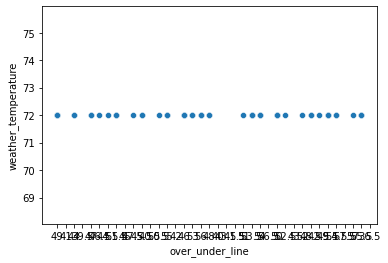

In [14]:
sns.scatterplot(x='over_under_line',y='weather_temperature', data= df_2020)

In [15]:
df_2020['total_points'] = df_2020['score_home']+df_2020['score_away']
df_2020['score_margin_hma'] = df_2020['score_home']-df_2020['score_away']

In [16]:
df_2020['score_margin_hma'].sum()

163

In [17]:
df_2020['spread_favorite'].sum() # Fix this to adjust spread always being a minus (if home team favorited, make value positive)

-1366.0

In [18]:
df_2020['total_points'].sum()

12585

In [19]:
df_2020['over_under_line']=df_2020.over_under_line.astype(float)

In [20]:
df_2020['over_under_line'].sum() # get rid of string values if any

12180.5

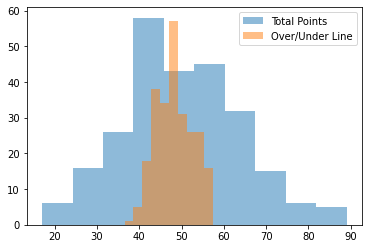

In [21]:
plt.hist(df_2020['total_points'], alpha=0.5, label='Total Points')
plt.hist(df_2020['over_under_line'], alpha=0.5, label='Over/Under Line')
plt.legend(loc='upper right')
plt.show()

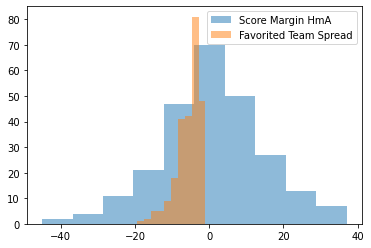

In [22]:
plt.hist(df_2020['score_margin_hma'], alpha=0.5, label='Score Margin HmA')
plt.hist(df_2020['spread_favorite'], alpha=0.5, label='Favorited Team Spread')
plt.legend(loc='upper right')
plt.show()

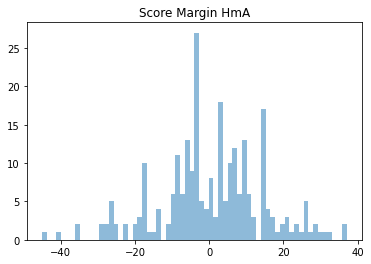

In [63]:
plt.hist(df_2020['score_margin_hma'], bins=64, alpha=0.5)
plt.title('Score Margin HmA')
plt.show()

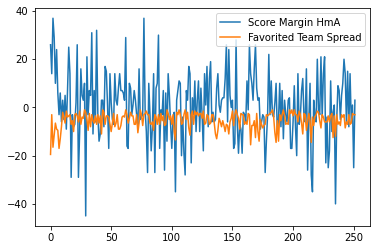

In [24]:
plt.plot(df_2020['score_margin_hma'], label='Score Margin HmA')
plt.plot(df_2020['spread_favorite'], label='Favorited Team Spread')
plt.legend(loc='upper right')
plt.show()

In [25]:
df_2020['spread_hma'] = np.where(df_2020['team_favorite']==df_2020['team_home'], df_2020['spread_favorite'], df_2020['spread_favorite']*-1)

# Training a Classification Model below for predicting whether the Scoring Margin is higher than the spread ("Yes"), the same as the spread ("Push"), or lower than the spread ("No") for the home team minus the away team

In [97]:
df_2020['was_margin_higher_than_spread'] = np.where(df_2020['delta_marg2spread']>0, 'Yes', 'No')
df_2020['was_margin_higher_than_spread'] = np.where(df_2020['delta_marg2spread']==0, 'Push', df_2020['was_margin_higher_than_spread'])
hmas_only['was_margin_higher_than_spread'] = np.where(hmas_only['delta_marg2spread']>0, 'Yes', 'No')
hmas_only['was_margin_higher_than_spread'] = np.where(hmas_only['delta_marg2spread']==0, 'Push', hmas_only['was_margin_higher_than_spread'])

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X = hmas_only.iloc[:,5:245]  #independent columns
y = hmas_only.iloc[:,249]    #target column i.e was_margin_higher_than_spread
#apply SelectKBest class to extract top 10 best features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(scaled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs     Score
106    3DConv_hma  0.728283
136      TD_hma.2  0.701378
155     TD_ad_hma  0.701378
175      TD_hma.3  0.701378
140  Att.1_td_hma  0.685417
195     Att_hma.3  0.685417
176    TD%_pd_hma  0.640173
178        PD_hma  0.634494
51       Rk_hma.1  0.634425
126     PF_td_hma  0.626066


In [153]:
hmas_only.head(1) #To see parameter options

,score_margin_hma,total_points,spread_hma,spread_hma_adjusted,delta_marg2spread,Rk_hma,G_hma,PF_hma,Yds_hma,Ply_hma,Y/P_hma,TO_hma,FL_hma,1stD_hma,Cmp_hma,Att_hma,Yds.1_hma,TD_hma,Int_hma,NY/A_hma,1stD.1_hma,Att.1_hma,Yds.2_hma,TD.1_hma,Y/A_hma,1stD.2_hma,Pen_hma,Yds.3_hma,1stPy_hma,Sc%_hma,TO%_hma,EXP_hma,Rk_po_hma,G_po_hma,Cmp_po_hma,Att_po_hma,Cmp%_hma,Yds_po_hma,TD_po_hma,TD%_hma,Int_po_hma,Int%_hma,Lng_hma,Y/A_po_hma,AY/A_hma,Y/C_hma,Y/G_hma,Rate_hma,Sk_hma,Yds.1_po_hma,NY/A_po_hma,ANY/A_hma,Sk%_hma,4QC_hma,GWD_hma,EXP_po_hma,Rk_hma.1,G_hma.1,Att_hma.1,Yds_hma.1,TD_hma.1,Lng_ro_hma,Y/A_hma.1,Y/G_ro_hma,Fmb_hma,EXP_hma.1,Rk_ret_hma,G_ret_hma,Ret_hma,Yds_ret_hma,TD_ret_hma,Lng_hma.1,Y/R_hma,Rt_hma,Yds.1_hma.1,TD.1_ret_hma,Lng.1_hma,Y/Rt_hma,APYd_hma,Rk_hma.2,G_hma.2,FGA_hma,FGM_hma,FGA.1_hma,FGM.1_hma,FGA.2_hma,FGM.2_hma,FGA.3_hma,FGM.3_hma,FGA.4_hma,FGM.4_hma,FGA.5_hma,FGM.5_hma,Lng_kp_hma,FG%_hma,XPA_hma,XPM_hma,XP%_hma,KO_hma,KOYds_hma,TB_hma,TB%_hma,KOAvg_hma,Pnt_hma,Yds_hma.2,Lng.1_kp_hma,Blck_hma,Y/P_kp_hma,Rk_oconv_hma,G_oconv_hma,3DAtt_hma,3DConv_hma,3D%_hma,4DAtt_hma,4DConv_hma,4D%_hma,RZAtt_hma,RZTD_hma,RZPct_hma,Rk_hma.3,G_hma.3,#Dr_hma,Plays_hma,Sc%_odriv_hma,TO%_odriv_hma,Plays.1_hma,Yds_odriv_hma,Time_hma,Pts_hma,Rk_td_hma,G_td_hma,PF_td_hma,Yds_hma.3,Ply_td_hma,Y/P_hma.1,TO_td_hma,FL_td_hma,1stD_td_hma,Cmp_hma.1,Att_td_hma,Yds.1_td_hma,TD_hma.2,Int_hma.1,NY/A_hma.1,1stD.1_td_hma,Att.1_td_hma,Yds.2_td_hma,TD.1_hma.1,Y/A_td_hma,1stD.2_td_hma,Pen_td_hma,Yds.3_td_hma,1stPy_td_hma,Sc%_hma.1,TO%_hma.1,EXP_td_hma,G_hma.4,Att_hma.2,Cmp_ad_hma,Yds_ad_hma,TD_ad_hma,DADOT_hma,Air_hma,YAC_hma,Bltz_hma,Bltz%_hma,Hrry_hma,Hrry%_hma,QBKD_hma,QBKD%_hma,Sk_ad_hma,Prss_hma,Prss%_hma,MTkl_hma,Rk_hma.4,G_pd_hma,Cmp_hma.2,Att_pd_hma,Cmp%_pd_hma,Yds_hma.4,TD_hma.3,TD%_pd_hma,Int_pd_hma,PD_hma,Int%_pd_hma,Y/A_hma.2,AY/A_pd_hma,Y/C_pd_hma,Y/G_hma.1,Rate_pd_hma,Sk_hma.1,Yds.1_hma.2,QBHits_hma,TFL_hma,NY/A_pd_hma,ANY/A_pd_hma,Sk%_pd_hma,EXP_hma.2,Rk_rd_hma,G_hma.5,Att_hma.3,Yds_rd_hma,TD_rd_hma,Y/A_rd_hma,Y/G_rd_hma,EXP_rd_hma,Rk_hma.5,G_retd_hma,Ret_retd_hma,Yds_hma.5,TD_hma.4,Y/R_retd_hma,Rt_retd_hma,Yds.1_retd_hma,TD.1_retd_hma,Y/Rt_retd_hma,Rk_kpd_hma,G_hma.6,FGA_kpd_hma,FGM_kpd_hma,FG%_kpd_hma,XPA_kpd_hma,XPM_kpd_hma,XP%_kpd_hma,Pnt_kpd_hma,Yds_kpd_hma,Blck_kpd_hma,Y/P_kpd_hma,Rk_hma.6,G_dconv_hma,3DAtt_dconv_hma,3DConv_dconv_hma,3D%_dconv_hma,4DAtt_dconv_hma,4DConv_dconv_hma,4D%_dconv_hma,RZAtt_dconv_hma,RZTD_dconv_hma,RZPct_dconv_hma,Rk_ddriv_hma,G_hma.7,#Dr_ddriv_hma,Plays_ddriv_hma,Sc%_ddriv_hma,TO%_ddriv_hma,Plays.1_ddriv_hma,Yds_hma.6,Time_ddriv_hma,Pts_ddriv_hma,was_margin_higher_than_spread
0,26,44,-19.5,19.5,-6.5,-26,0,230,2174,109,1.6,-3,4,128,128,131,2058,24,-7,2.2,109,-3,116,4,0.4,16,4,-33,3,21.6,-1.7,339.89,-30,0,128,131,8.2,2058,24,3.1,-7,-1.7,6,1.7,3.1,1.2,128.6,31.4,-19,-168,2.2,3.6,-4.2,3,3,299.02,-7,0,-3,116,4,-14,0.4,7.2,11,38.38,-2,0,18,77,1,49,-2.8,-16,-165,1,36,6.0,2041,4,0,2,2,0,1,-1,0,-1,0,-1,1,-1,4,3,0.176,30,28,0.056,34,2165,38,0.202,0.3,-30,-1259,7,0,1.1,-26,0,-12,25,0.15,-2,2,0.174,21,20,0.189,12,0,-12,108,21.6,-1.7,1.1,15.1,0.01875,1.38,-15,0,-95,-468,-59,-0.1,3,-3,-28,-69,-48,-630,-5,6,-0.5,-33,-12,162,-2,0.5,13,-2,-139,-8,-8.5,2.3,41.26,0,-48,-69,-630,-5,0.8,-446,6,-27,-0.027,-2,0.001,13,0.03,1,12,0.029,-13,-14,0,-69,-48,-6.4,-630,-5,-0.4,6,-3,1.2,-0.5,-1.1,0.4,-39.4,-13.8,1,3,15,-25,-0.5,-1.1,0.5,106.18,9,0,-12,162,-2,0.5,10.1,-78.1,2,0,-23,-327,0,-3.8,-4,-121,1,-0.9,-4,0,-9,-11,-0.137,-12,-12,-0.012,3,375,-2,4.3,-13,0,-14,-13,-0.036,8,8,0.233,-13,0,0.166,-8,0,-8,-68,-8.5,2.3,-0.1,-1.1,-0.002778,-0.37,No


In [148]:
# Naive Bayes Classifier Model to predict whether scoring margin was higher, lower, or exactly the spread
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(hmas_only[['Y/P_hma','QBHits_hma','3D%_dconv_hma','3DConv_hma']],hmas_only['was_margin_higher_than_spread'],random_state=0)
#'Cmp_hma','Att_hma', 'Cmp%_hma', 'TD_hma.2''
#Tested and removed parameters ^^^
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.5396825396825397

In [152]:
# Print Classificiation_report and RMSE
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.45      0.58      0.51        24
        Push       0.00      0.00      0.00         2
         Yes       0.62      0.54      0.58        37

    accuracy                           0.54        63
   macro avg       0.36      0.37      0.36        63
weighted avg       0.54      0.54      0.53        63



C:\Users\mattg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mattg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mattg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
# kNN model to predict whether scoring margin was higher, lower, or exactly the spread
from sklearn.model_selection import train_test_split
hmas_only = hmas_only.dropna()
X_train, X_test, y_train, y_test = train_test_split(
        hmas_only[['Y/P_hma','QBHits_hma','3D%_dconv_hma','3DConv_hma']],hmas_only['was_margin_higher_than_spread'],
        test_size=1/4.0,
        random_state=0
    )

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
print("RMSE on testing set = ", mean_squared_error(y_test, y_pred))

ValueError: could not convert string to float: 'Yes'

In [ ]:
# Random Forest model to predict whether scoring margin was higher, lower, or exactly the spread
from sklearn.model_selection import train_test_split
hmas_only = hmas_only.dropna()
X_train, X_test, y_train, y_test = train_test_split(
        hmas_only[['Y/P_hma','QBHits_hma','3D%_dconv_hma','3DConv_hma']],hmas_only['was_margin_higher_than_spread'],
        test_size=1/4.0,
        random_state=0
    )

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
print("RMSE on testing set = ", mean_squared_error(y_test, y_pred))

# Linear Regression Work on predicting exact delta between hometeam-awayteam scoring margin minus hometeam-awayteam spread margin done below

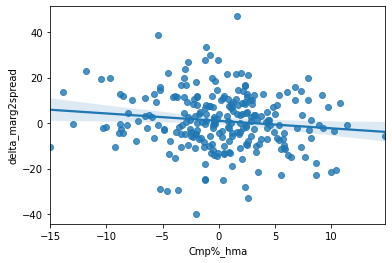

In [86]:
sns.regplot(x = 'Cmp%_hma', y ='delta_marg2spread', data=hmas_only)
plt.show()

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(hmas_only[['Cmp_hma','Att_hma','Cmp%_hma','TD_ret_hma']],hmas_only['delta_marg2spread'],random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#from sklearn.metrics import mean_absolute_error
#y_true = [3, -0.5, 2]
#mean_absolute_error(y_true, y_pred)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

#from sklearn.metrics import r2_score
#r2_score(y_true, y_pred)

163.8760283665354

# Other Studies/Plotting done below

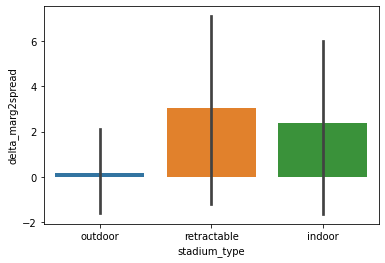

In [59]:
stadium_plot = sns.barplot(data = df_2020, x = "stadium_type", y='delta_marg2spread')
#stadium_plot.set_axis_labels("Stadium", "Margin Minus Spread")
#stadium_plot.set_xticklabels(rotation=90)
plt.show(stadium_plot)


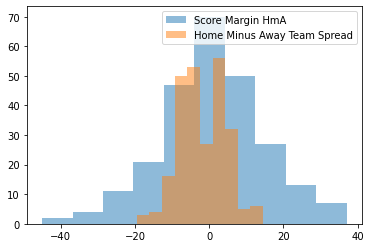

In [50]:
plt.hist(df_2020['score_margin_hma'], alpha=0.5, label='Score Margin HmA')
plt.hist(df_2020['spread_hma'], alpha=0.5, label='Home Minus Away Team Spread')
plt.legend(loc='upper right')
plt.show()

In [28]:
df_2020['delta_marg2spread'] = (df_2020['score_margin_hma']*-1)-df_2020['spread_hma']

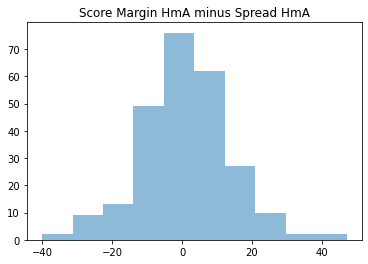

In [43]:
plt.hist(df_2020['delta_marg2spread'], alpha=0.5)
plt.title('Score Margin HmA minus Spread HmA')
plt.show()

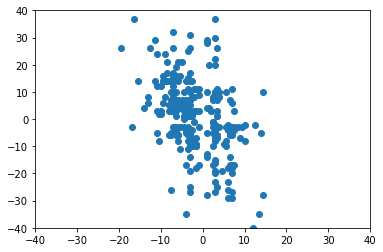

In [30]:
plt.scatter(df_2020['spread_hma'],df_2020['score_margin_hma'])
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.show()

In [31]:
df_2020.to_csv('ready_for_hma_deltas.csv')

In [5]:
df_2020_hmas = pd.read_csv('has_hma_deltas.csv')
for_pca = pd.read_csv('for_pca.csv')
hmas_only = pd.read_csv('hma_deltas_only.csv')

In [6]:
# Predict Score Margin for Home minus Away scores
from sklearn.model_selection import train_test_split
hmas_only = hmas_only.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
        hmas_only.drop(['score_margin_hma', 'spread_hma', 'delta_marg2spread'], axis=1),
        hmas_only['score_margin_hma'],
        test_size=1/4.0,
        random_state=0
    )

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state = 0)
regressor.fit(X_train, Y_train)
y_preds = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
print("RMSE on testing set = ", mean_squared_error(Y_test, y_preds))

RMSE on testing set =  155.61193888888883


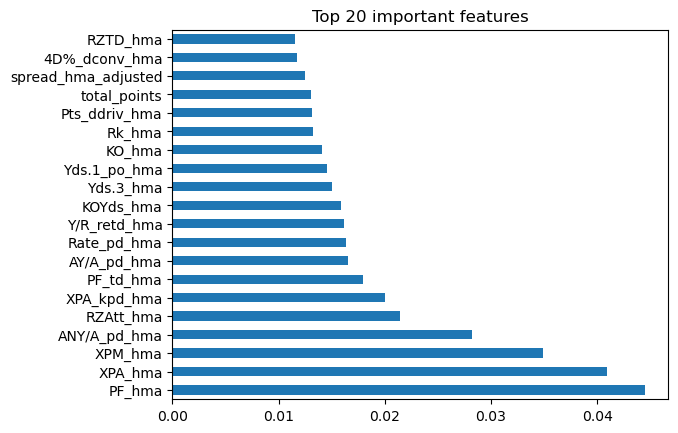

In [17]:
feat_importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show()

In [10]:
hmas_only.head(2)

,score_margin_hma,total_points,spread_hma,spread_hma_adjusted,delta_marg2spread,Rk_hma,G_hma,PF_hma,Yds_hma,Ply_hma,Y/P_hma,TO_hma,FL_hma,1stD_hma,Cmp_hma,Att_hma,Yds.1_hma,TD_hma,Int_hma,NY/A_hma,1stD.1_hma,Att.1_hma,Yds.2_hma,TD.1_hma,Y/A_hma,1stD.2_hma,Pen_hma,Yds.3_hma,1stPy_hma,Sc%_hma,TO%_hma,EXP_hma,Rk_po_hma,G_po_hma,Cmp_po_hma,Att_po_hma,Cmp%_hma,Yds_po_hma,TD_po_hma,TD%_hma,Int_po_hma,Int%_hma,Lng_hma,Y/A_po_hma,AY/A_hma,Y/C_hma,Y/G_hma,Rate_hma,Sk_hma,Yds.1_po_hma,NY/A_po_hma,ANY/A_hma,Sk%_hma,4QC_hma,GWD_hma,EXP_po_hma,Rk_hma.1,G_hma.1,Att_hma.1,Yds_hma.1,TD_hma.1,Lng_ro_hma,Y/A_hma.1,Y/G_ro_hma,Fmb_hma,EXP_hma.1,Rk_ret_hma,G_ret_hma,Ret_hma,Yds_ret_hma,TD_ret_hma,Lng_hma.1,Y/R_hma,Rt_hma,Yds.1_hma.1,TD.1_ret_hma,Lng.1_hma,Y/Rt_hma,APYd_hma,Rk_hma.2,G_hma.2,FGA_hma,FGM_hma,FGA.1_hma,FGM.1_hma,FGA.2_hma,FGM.2_hma,FGA.3_hma,FGM.3_hma,FGA.4_hma,FGM.4_hma,FGA.5_hma,FGM.5_hma,Lng_kp_hma,FG%_hma,XPA_hma,XPM_hma,XP%_hma,KO_hma,KOYds_hma,TB_hma,TB%_hma,KOAvg_hma,Pnt_hma,Yds_hma.2,Lng.1_kp_hma,Blck_hma,Y/P_kp_hma,Rk_oconv_hma,G_oconv_hma,3DAtt_hma,3DConv_hma,3D%_hma,4DAtt_hma,4DConv_hma,4D%_hma,RZAtt_hma,RZTD_hma,RZPct_hma,Rk_hma.3,G_hma.3,#Dr_hma,Plays_hma,Sc%_odriv_hma,TO%_odriv_hma,Plays.1_hma,Yds_odriv_hma,Time_hma,Pts_hma,Rk_td_hma,G_td_hma,PF_td_hma,Yds_hma.3,Ply_td_hma,Y/P_hma.1,TO_td_hma,FL_td_hma,1stD_td_hma,Cmp_hma.1,Att_td_hma,Yds.1_td_hma,TD_hma.2,Int_hma.1,NY/A_hma.1,1stD.1_td_hma,Att.1_td_hma,Yds.2_td_hma,TD.1_hma.1,Y/A_td_hma,1stD.2_td_hma,Pen_td_hma,Yds.3_td_hma,1stPy_td_hma,Sc%_hma.1,TO%_hma.1,EXP_td_hma,G_hma.4,Att_hma.2,Cmp_ad_hma,Yds_ad_hma,TD_ad_hma,DADOT_hma,Air_hma,YAC_hma,Bltz_hma,Bltz%_hma,Hrry_hma,Hrry%_hma,QBKD_hma,QBKD%_hma,Sk_ad_hma,Prss_hma,Prss%_hma,MTkl_hma,Rk_hma.4,G_pd_hma,Cmp_hma.2,Att_pd_hma,Cmp%_pd_hma,Yds_hma.4,TD_hma.3,TD%_pd_hma,Int_pd_hma,PD_hma,Int%_pd_hma,Y/A_hma.2,AY/A_pd_hma,Y/C_pd_hma,Y/G_hma.1,Rate_pd_hma,Sk_hma.1,Yds.1_hma.2,QBHits_hma,TFL_hma,NY/A_pd_hma,ANY/A_pd_hma,Sk%_pd_hma,EXP_hma.2,Rk_rd_hma,G_hma.5,Att_hma.3,Yds_rd_hma,TD_rd_hma,Y/A_rd_hma,Y/G_rd_hma,EXP_rd_hma,Rk_hma.5,G_retd_hma,Ret_retd_hma,Yds_hma.5,TD_hma.4,Y/R_retd_hma,Rt_retd_hma,Yds.1_retd_hma,TD.1_retd_hma,Y/Rt_retd_hma,Rk_kpd_hma,G_hma.6,FGA_kpd_hma,FGM_kpd_hma,FG%_kpd_hma,XPA_kpd_hma,XPM_kpd_hma,XP%_kpd_hma,Pnt_kpd_hma,Yds_kpd_hma,Blck_kpd_hma,Y/P_kpd_hma,Rk_hma.6,G_dconv_hma,3DAtt_dconv_hma,3DConv_dconv_hma,3D%_dconv_hma,4DAtt_dconv_hma,4DConv_dconv_hma,4D%_dconv_hma,RZAtt_dconv_hma,RZTD_dconv_hma,RZPct_dconv_hma,Rk_ddriv_hma,G_hma.7,#Dr_ddriv_hma,Plays_ddriv_hma,Sc%_ddriv_hma,TO%_ddriv_hma,Plays.1_ddriv_hma,Yds_hma.6,Time_ddriv_hma,Pts_ddriv_hma
0,26,44,-19.5,19.5,-6.5,-26,0,230,2174,109,1.6,-3,4,128,128,131,2058,24,-7,2.2,109,-3,116,4,0.4,16,4,-33,3,21.6,-1.7,339.89,-30,0,128,131,8.2,2058,24,3.1,-7,-1.7,6,1.7,3.1,1.2,128.6,31.4,-19,-168,2.2,3.6,-4.2,3,3,299.02,-7,0,-3,116,4,-14,0.4,7.2,11,38.38,-2,0,18,77,1,49,-2.8,-16,-165,1,36,6.0,2041,4,0,2,2,0,1,-1,0,-1,0,-1,1,-1,4,3,0.176,30,28,0.056,34,2165,38,0.202,0.3,-30,-1259,7,0,1.1,-26,0,-12,25,0.150,-2,2,0.174,21,20,0.189,12,0,-12,108,21.6,-1.7,1.1,15.1,0.018750,1.38,-15,0,-95,-468,-59,-0.1,3,-3,-28,-69,-48,-630,-5,6,-0.5,-33,-12,162,-2,0.5,13,-2,-139,-8,-8.5,2.3,41.26,0,-48,-69,-630,-5,0.8,-446,6,-27,-0.027,-2,0.001,13,0.030,1,12,0.029,-13,-14,0,-69,-48,-6.4,-630,-5,-0.4,6,-3,1.2,-0.5,-1.1,0.4,-39.4,-13.8,1,3,15,-25,-0.5,-1.1,0.5,106.18,9,0,-12,162,-2,0.5,10.1,-78.10,2,0,-23,-327,0,-3.8,-4,-121,1,-0.9,-4,0,-9,-11,-0.137,-12,-12,-0.012,3,375,-2,4.3,-13,0,-14,-13,-0.036,8,8,0.233,-13,0,0.166,-8,0,-8,-68,-8.5,2.3,-0.1,-1.1,-0.002778,-0.37
1,14,42,-3.0,3.0,-11.0,-5,0,83,757,31,0.6,0,0,63,-9,-59,94,-4,0,0.9,11,96,663,11,0.6,49,-39,-418,3,10.6,1.2,114.95,-1,0,-9,-59,5.8,94,-4,-0.5,0,0.4,-19,0.9,0.6,0.3,5.8,5.2,-6,-85,0.9,0.6,-0.1,1,3,48.12,-19,0,96,663,11,3,0.6,41.4,11,64.39,-4,0,13,271,1,52,6.9,-10,-94,0,-13,3.3,832,21,0,0,0,-1,0,-3,-2,6,8,-2,-1,0,5,-4,0.179,9,10,0.076,12,791,8,0.020,0.5,-27,-920,11,0,4.8,-6,0,-20,6,0.069,-1,2,0.140,10,10,0.121,15,0,-18,31,10.6,1

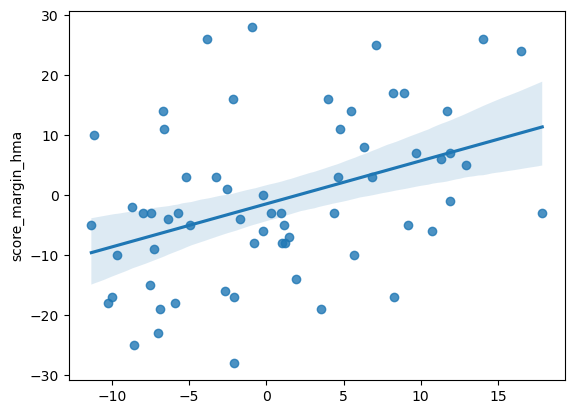

In [9]:
sns.regplot(x=y_preds, y=Y_test)
plt.show()

In [39]:
from sklearn.svm import LinearSVC
X_train, X_test, Y_train, Y_test = train_test_split(
        hmas_only.drop(['total_points', 'spread_hma', 'delta_marg2spread'], axis=1),
        hmas_only['total_points'],
        test_size=0.25,
        random_state=0
    )

svm = LinearSVC()
svm.fit(X_train, Y_train)
y_preds = svm.predict(X_test)

C:\Users\mattg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [34]:
# Predict Point Total to use for Over/Unders
from sklearn.model_selection import train_test_split
hmas_only = hmas_only.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(
        hmas_only.drop(['total_points', 'spread_hma', 'delta_marg2spread'], axis=1),
        hmas_only['total_points'],
        test_size=1/4.0,
        random_state=0
    )

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state = 0)
regressor.fit(X_train, Y_train)
y_preds = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
print("RMSE on testing set = ", mean_squared_error(Y_test, y_preds))

RMSE on testing set =  177.25242206349208


### LEFT OFF HERE. CONTINUE WORKING ON RANDOM FOREST APPROACH ABOVE.

In [41]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(for_pca)

In [42]:
scaled

array([[ 1.87501966, -1.81387272,  0.71573373, ..., -0.87625662,
        -0.17499235, -0.75601032],
       [ 3.25165892,  0.13163026,  0.71573373, ...,  0.96558769,
         0.01825074,  0.90975853],
       [ 1.13375236, -1.71659758,  1.30709405, ..., -1.28555536,
        -1.75958569, -1.43465688],
       ...,
       [-0.87825887,  1.7853078 , -0.61482701, ..., -0.05765915,
        -1.10255919,  0.37506729],
       [-2.36079346,  1.29893205,  0.42005357, ...,  0.14699022,
         0.21149383, -0.0979288 ],
       [-2.67847945,  1.9798581 ,  1.01141389, ..., -0.67160725,
        -0.75472162,  0.45732748]])